# Day 4th - calculation of statistical errors

Giovanni:

As we said before, probable a reasonable idea would be:
- Recompute the average energies as done in day 2, also computing their statistical error with block analysis
- Learn how to do bootstrap on blocks and do the statistical error on the specific heat (computed from fluctuations of potential energy)
- Perhaps they can be shown that the error calculation is tricky close to the phase transition. The error will likely be underestimated there, because there could be a single transition (solid to liquid, usually)

Useful reference: https://matteocourthoud.github.io/post/bayes_boot/

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ene = {}
Ts = np.linspace(0.1, 3, 30)

for temp in Ts:
    ene[temp] = np.loadtxt("Results/energiesT%.1f.dat" % temp)

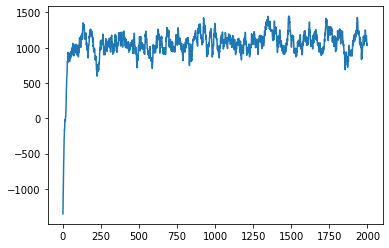

In [5]:
plt.plot(ene[temp][:,4], '-')

In [6]:
x = ene[temp][:, 4]

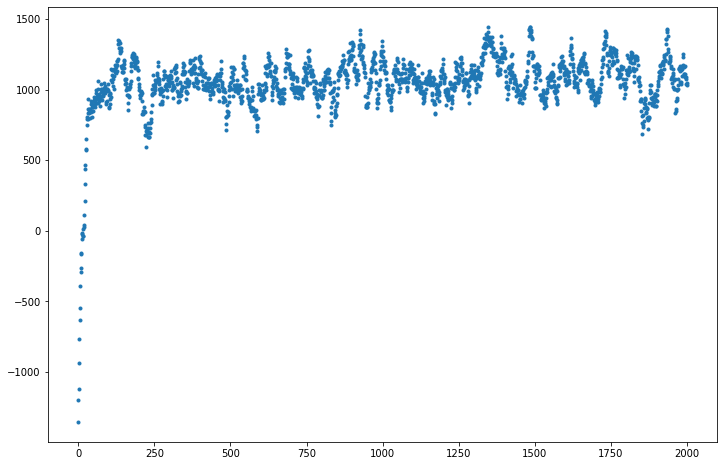

mean:  1051.4033535849999
std (on the mean):  [4.55016484]


In [7]:
plt.figure(figsize=(12, 8))
plt.plot(x, '.')
#plt.plot(x[1500:1550],'.-')
plt.show()

size = np.shape(x)
mean = np.mean(x)
std = np.std(x)

print('mean: ', mean)
print('std (on the mean): ', std/np.sqrt(size))

In [15]:
def block_analysis(x):
    
    size = len(x)
    size_blocks = np.arange(100, size, 100)

    n_blocks = []
    epsilon = []

    for size_block in size_blocks:
        n_blocks.append(int(size/size_block))
        
        a = 0
        for i in range(n_blocks[-1]):
            a += (np.mean(x[(size_block*i):(size_block*(i+1))]))**2

        epsilon.append(np.sqrt((a/n_blocks[-1] - mean**2)/n_blocks[-1]))
    
    ################# second plot (epsilon vs. n. blocks)
    plt.figure(figsize=(10,6))
    plt.plot(n_blocks, epsilon, '.--')
    plt.xlabel('number of blocks')
    plt.xscale('log')
    plt.grid()
    
    # meanepsilon=np.mean(epsilon[:500])
    # print('epsilon mean up to 500',np.mean(epsilon[:500]))
    
    return size, mean, std, epsilon#, meanepsilon

In [14]:
len(x)

2000

In [17]:
size = len(x)
size_blocks = np.arange(100, size, 100)

n_blocks = []
epsilon = []

for size_block in size_blocks:
    n_blocks.append(int(size/size_block))
    
    a = 0
    for i in range(n_blocks[-1]):
        a += (np.mean(x[(size_block*i):(size_block*(i+1))]))**2

    epsilon.append(np.sqrt((a/n_blocks[-1] - mean**2)/n_blocks[-1]))

/tmp/ipykernel_11522/4061319663.py:14: RuntimeWarning: invalid value encountered in sqrt
  epsilon.append(np.sqrt((a/n_blocks[-1] - mean**2)/n_blocks[-1]))


In [18]:
size_blocks

array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900])

/tmp/ipykernel_11522/1434860000.py:16: RuntimeWarning: invalid value encountered in sqrt
  epsilon.append(np.sqrt((a/n_blocks[-1] - mean**2)/n_blocks[-1]))


(2000,
 1051.4033535849999,
 203.4895578344174,
 [25.992093254518533,
  23.10638438024309,
  17.400142321905,
  27.84101396366154,
  28.674758704308648,
  9.897391203379959,
  nan,
  nan,
  nan,
  31.021807071616873,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan])

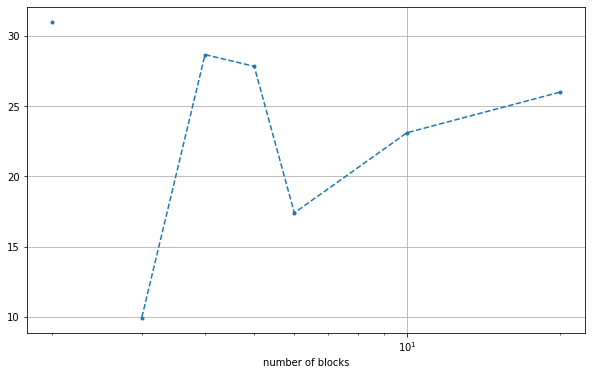

In [16]:
block_analysis(x)